## Movie Rating prediction with python

## Problem statement :
• Build a model that predicts the rating of a movie based on features
like genre, director, and actors. You can use regression techniques to
tackle this problem.
• The goal is to analyze historical movie data and develop a model that
accurately estimates the rating given to a movie by users or critics.
• Movie Rating Prediction project enables you to explore data analysis,
preprocessing, feature engineering, and machine learning modeling
techniques. It provides insights into the factors that influence movie
ratings and allows you to build a model that can estimate the ratings
of movies accurately.

## Python Implementation

In [2]:
##importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## loading the data
data=pd.read_csv('IMDb Movies India.csv', encoding='latin1')

In [4]:
## Getting the first few rows of data
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [5]:
# Domian analysis.

## Basic Checks

In [6]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
data.describe(include='O')

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


## Exploratory Data Analysis

In [9]:
# Univariate analysis
# Bivaraite analysis--Autoviz

In [10]:
!pip install sweetviz

In [11]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


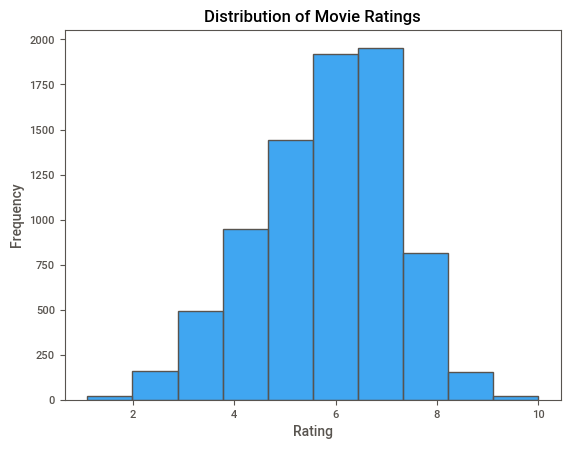

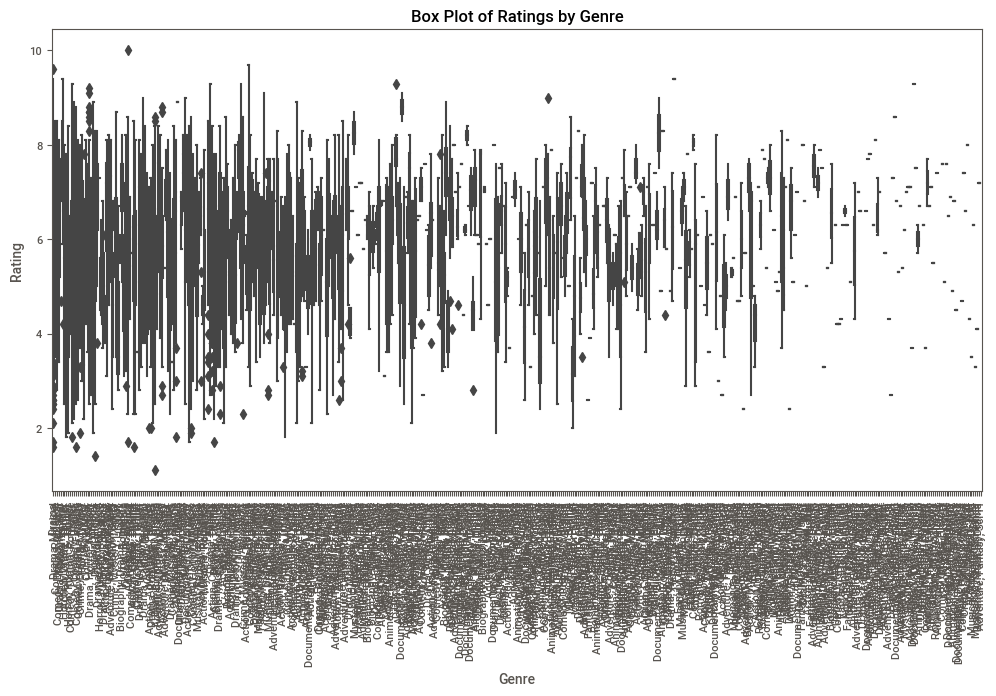

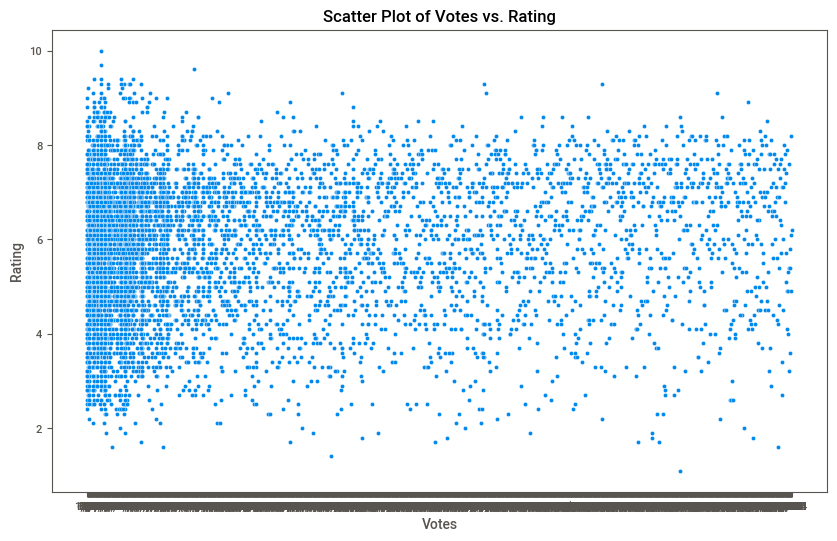

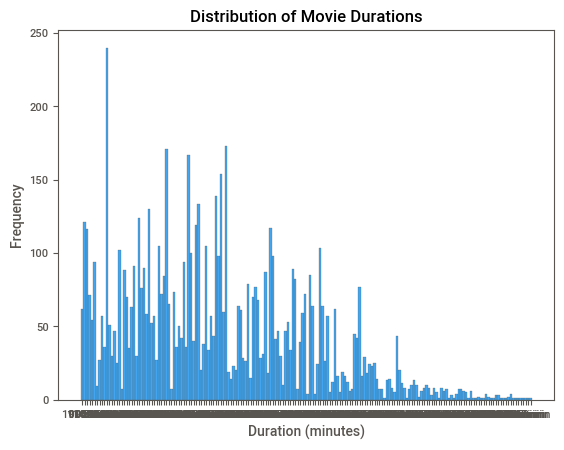

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of movie ratings
sns.histplot(data['Rating'], bins=10)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Box plot of ratings by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Rating', data=data)
plt.title('Box Plot of Ratings by Genre')
plt.xticks(rotation=90)
plt.show()

# Scatter plot of votes vs. rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', data=data)
plt.title('Scatter Plot of Votes vs. Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

# Distribution of movie durations
sns.histplot(data['Duration'], bins=10)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


## Data Preprocessing Pipeline

In [13]:
## Checking missing values

data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [14]:
data.shape

(15509, 10)

In [15]:
# Ensure the 'Year' column is treated as a string
data['Year'] = data['Year'].astype(str)

In [16]:

# Extract the year from 'Year', fill NaN values with a default year (e.g., 2000), and convert to integers
data['Year'] = data['Year'].str.extract('(\d+)').fillna('2000').astype(str)


In [17]:
# Fill missing values or drop rows/columns based on the context and analysis needs
# For example, fill missing 'Duration' with the median duration
data['Duration'] = data['Duration'].str.extract('(\d+)').astype(float)
data['Duration'].fillna(data['Duration'].median(), inplace=True)

In [18]:

# Fill missing 'Genre' with a placeholder
data['Genre'].fillna('Unknown', inplace=True)

In [19]:
# Fill missing 'Rating' with the mean rating
data['Rating'].fillna(data['Rating'].mean(), inplace=True)

In [20]:

# Function to convert votes to numeric values
def convert_votes(vote_str):
    if pd.isna(vote_str):
        return np.nan
    vote_str = vote_str.replace(',', '').replace('$', '')
    if 'K' in vote_str:
        return float(vote_str.replace('K', '')) * 1e3
    if 'M' in vote_str:
        return float(vote_str.replace('M', '')) * 1e6
    return float(vote_str)

# Apply the conversion function to the 'Votes' column
data['Votes'] = data['Votes'].apply(convert_votes)

# Fill missing values with the median number of votes
data['Votes'].fillna(data['Votes'].median(), inplace=True)

In [21]:
# Fill missing actor and director names with 'Unknown'
data[['Director', 'Actor 1', 'Actor 2', 'Actor 3']] = data[['Director', 'Actor 1', 'Actor 2', 'Actor 3']].fillna('Unknown')

## Convert Data types

In [22]:
# Ensure 'Year' is treated as string
data['Year'] = data['Year'].astype(str)

# Convert 'Duration' to integer
data['Duration'] = data['Duration'].astype(int)

# Ensure 'Rating' is float
data['Rating'] = data['Rating'].astype(float)

# Ensure 'Votes' is integer
data['Votes'] = data['Votes'].astype(int)


## Feature Engineering

In [23]:
# Example: Extract decade from the 'Year'
data['Decade'] = (data['Year'].astype(int) // 10) * 10

# Example: Categorize movies based on their duration
data['Duration_Category'] = pd.cut(data['Duration'], bins=[0, 90, 120, float('inf')],
                                   labels=['Short', 'Medium', 'Long'])


In [24]:
data['Duration_Category'] 

0          Long
1        Medium
2         Short
3        Medium
4        Medium
          ...  
15504      Long
15505      Long
15506      Long
15507      Long
15508      Long
Name: Duration_Category, Length: 15509, dtype: category
Categories (3, object): ['Short' < 'Medium' < 'Long']

In [25]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Duration_Category'], drop_first=True)

# Convert 'Year' and 'Decade' to numeric for modeling purposes
data['Year'] = data['Year'].astype(int)
data['Decade'] = data['Decade'].astype(int)

# Ensure the data looks good
print(data.head())


                                 Name  Year  Duration    Rating  Votes  \
0                                      2000       131  5.841621     55   
1  #Gadhvi (He thought he was Gandhi)  2019       109  7.000000      8   
2                         #Homecoming  2021        90  5.841621     55   
3                             #Yaaram  2019       110  4.400000     35   
4                   ...And Once Again  2010       105  5.841621     55   

   Decade  Genre_Action, Adventure  Genre_Action, Adventure, Biography  \
0    2000                    False                               False   
1    2010                    False                               False   
2    2020                    False                               False   
3    2010                    False                               False   
4    2010                    False                               False   

   Genre_Action, Adventure, Comedy  Genre_Action, Adventure, Crime  ...  \
0                            False 

In [26]:
# Define feature columns and target variable
X = data.drop(columns=['Name', 'Rating'])
Y = data['Rating']


In [33]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)


In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Training R²: {train_r2:.2f}")
print(f"Test R²: {test_r2:.2f}")


Training RMSE: 2.66
Test RMSE: 83762353916474.83
Training R²: -6.13
Test R²: -7722276736641761092850155520.00
